# API

### Importamos librerias

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sqlite3

### 1- Cargamos las variables de entorno

In [12]:
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

### 2- Inicializamos la conexion con Spotify
> Despues creamos el objeto de autenticación y el cliente de spotify

In [ ]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

### 3- Obtenemos el top 10 de canciones de un artista
> Usamos una función 

In [ ]:
def obtener_top10_con_nombre(artist_id):
    artista = sp.artist(artist_id)
    nombre_artista = artista['name']
    top_tracks = sp.artist_top_tracks(artist_id, country='ES')['tracks']
    canciones = []
    for track in top_tracks[:10]:
        canciones.append({
            'artista': nombre_artista,
            'nombre': track['name'],
            'popularidad': track['popularity'],
            'duration_min': track['duration_ms'] / 60000
        })
    return pd.DataFrame(canciones)


In [5]:
print(os.environ.get("CLIENT_ID"))
print(os.environ.get("CLIENT_SECRET"))

1e987ea69c564c1cae289aabbb1122c1
606b15693a6a40a2a7da15ae937adad4


### 4- Llamamos a la función para obtener datos.

In [ ]:
artist_id = '3TVXtAsR1Inumwj472S9r4'  
canciones = obtener_top10_con_nombre(artist_id)
print(canciones)

# Ordena por popularidad ascendente y muestra el top 3 menos populares
menos_populares = canciones.sort_values(by='popularidad', ascending=True).head(3)
print(menos_populares)


  artista                           nombre  popularidad  duration_min
0   Drake    Which One (feat. Central Cee)           88      2.818900
1   Drake                            NOKIA           88      4.017050
2   Drake                        One Dance           87      2.899767
3   Drake                 What Did I Miss?           86      3.238733
4   Drake                     Passionfruit           85      4.982333
5   Drake                        Headlines           84      3.933100
6   Drake                         She Will           79      5.097333
7   Drake                       God's Plan           84      3.316217
8   Drake                       DIE TRYING           83      3.257183
9   Drake  WAIT FOR U (feat. Drake & Tems)           83      3.164883
  artista                           nombre  popularidad  duration_min
6   Drake                         She Will           79      5.097333
8   Drake                       DIE TRYING           83      3.257183
9   Drake  WAIT FOR 

### 5- Grafica de Dispersión (scatter plot)

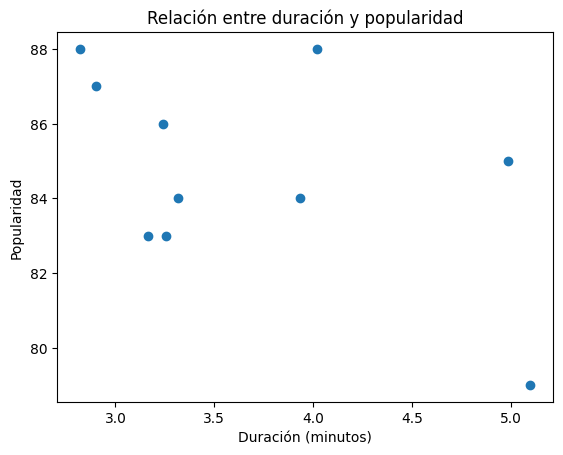

In [ ]:
plt.scatter(canciones['duration_min'], canciones['popularidad'])
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.title('Relación entre duración y popularidad')
plt.show()

### Crea un marco de datos de Python Pandas para facilitar la manipulación de los datos.
> Aunque ya tengo un DataFrame de Pandas en mi función obtener_top10_con_nombre, aquí muestro cómo crear explícitamente un DataFrame a partir de una lista de diccionarios, para poder manipularlo fácilmente:

In [ ]:
# Ejemplo de cómo crear un DataFrame de Pandas desde cero
datos = [
    {"artista": "Drake", "nombre": "Canción 1", "popularidad": 85, "duration_min": 3.5},
    {"artista": "Drake", "nombre": "Canción 2", "popularidad": 90, "duration_min": 4.0},
    {"artista": "Drake", "nombre": "Canción 3", "popularidad": 78, "duration_min": 2.8}
]

df = pd.DataFrame(datos)
print(df)

  artista     nombre  popularidad  duration_min
0   Drake  Canción 1           85           3.5
1   Drake  Canción 2           90           4.0
2   Drake  Canción 3           78           2.8


> Realmente el DataFrame canciones que obtengo de la función ya es un marco de datos de Pandas, así que puedo manipularlo directamente, por ejemplo:

In [17]:
print(canciones.head())  # Muestra las primeras filas del DataFrame
print(canciones.describe())  # Estadísticas básicas


  artista                         nombre  popularidad  duration_min
0   Drake  Which One (feat. Central Cee)           88      2.818900
1   Drake                          NOKIA           88      4.017050
2   Drake                      One Dance           87      2.899767
3   Drake               What Did I Miss?           86      3.238733
4   Drake                   Passionfruit           85      4.982333
       popularidad  duration_min
count    10.000000     10.000000
mean     84.700000      3.672550
std       2.750757      0.816731
min      79.000000      2.818900
25%      83.250000      3.183346
50%      84.500000      3.286700
75%      86.750000      3.996063
max      88.000000      5.097333


### Esto creará un archivo canciones.db en mi proyecto y guardará los datos del DataFrame en la tabla top_canciones.

In [19]:

# Conexión a una base de datos SQLite (crea el archivo si no existe)
conn = sqlite3.connect('canciones.db')

# Guarda el DataFrame 'canciones' en una tabla llamada 'top_canciones'
canciones.to_sql('top_canciones', conn, if_exists='replace', index=False)

# Opcional: verifica que los datos se guardaron correctamente
df_sql = pd.read_sql('SELECT * FROM top_canciones', conn)
print(df_sql.head())

# Cierra la conexión
conn.close()

  artista                         nombre  popularidad  duration_min
0   Drake  Which One (feat. Central Cee)           88      2.818900
1   Drake                          NOKIA           88      4.017050
2   Drake                      One Dance           87      2.899767
3   Drake               What Did I Miss?           86      3.238733
4   Drake                   Passionfruit           85      4.982333
